# SIR Model using `scipy`

$$ \frac{dS(t)}{dt} = - \beta S(t) I(t) $$
$$ \frac{dI(t)}{dt} = \beta S(t) I(t) - \gamma I(t) $$
$$ \frac{dR(t)}{dt} = \gamma I(y) $$

### Modules

In [19]:
# Data Wrangling
import numpy as np
import pandas as pd

# Network Data Analysis 
import networkx as nx

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt 
%pylab inline

# Numerical Computation
from scipy.integrate import odeint, ode, solve_ivp  

# Other Utilities
from operator import itemgetter
from collections import defaultdict

# Custom Modules
import digital_epidemiology as depi

# Reload Custom Modules
from importlib import reload
depi = reload(depi)

Populating the interactive namespace from numpy and matplotlib


## Parameters

In [20]:
parameters = [0.1,0.05]
initial_condition = [0.99,0.01,0]
times = np.linspace(0,200,2001)

## Simulation

In [21]:
solution = solve_ivp(fun=lambda t, y: depi.SIR_ODE(t, y, parameters), t_span=[min(times),max(times)], y0=initial_condition, t_eval=times)

data = pd.DataFrame({"t":solution["t"],"S":solution["y"][0],"I":solution["y"][1],"R":solution["y"][2]}) 

## Visualization

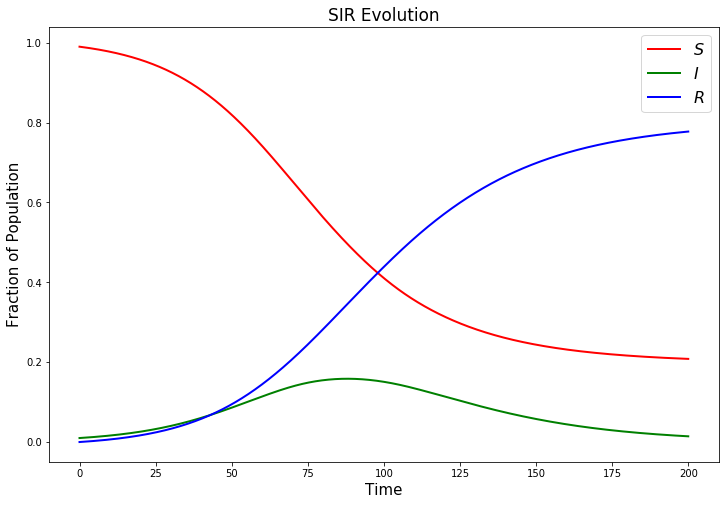

In [22]:
#plt.style.use("ggplot")
plt.figure(figsize=(12,8))
plt.plot("t","S","",data=data,color="red",linewidth=2)
plt.plot("t","I","",data=data,color="green",linewidth=2)
plt.plot("t","R","",data=data,color="blue",linewidth=2)
plt.xlabel("Time", fontsize=15)
plt.ylabel("Fraction of Population", fontsize=15)
plt.title("SIR Evolution", fontsize=17)
plt.legend(("$S$","$I$","$R$"), loc = "upper right", fontsize = 16)
plt.show()